In [478]:
### Data Collection
import pandas_datareader as pdr

In [479]:
df = pdr.get_data_tiingo('AAPL', api_key = "4b02afe8c6b9cb1c67dffc27f73a9a98195270af")

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [480]:
import pandas as pd

In [481]:
df.to_csv('AAPL.csv')

In [482]:
df=pd.read_csv('AAPL.csv')

In [483]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-03-14 00:00:00+00:00,138.99,139.6500,138.840,139.30,15309065,32.802172,32.957934,32.766771,32.875333,61236260,0.0,1.0
1,AAPL,2017-03-15 00:00:00+00:00,140.46,140.7501,139.025,139.41,25691774,33.149097,33.217562,32.810432,32.901293,102767096,0.0,1.0
2,AAPL,2017-03-16 00:00:00+00:00,140.69,141.0200,140.260,140.72,19231998,33.203378,33.281260,33.101897,33.210458,76927992,0.0,1.0
3,AAPL,2017-03-17 00:00:00+00:00,139.99,141.0000,139.890,141.00,43884952,33.038176,33.276539,33.014575,33.276539,175539808,0.0,1.0
4,AAPL,2017-03-20 00:00:00+00:00,141.46,141.5000,140.230,140.40,21542038,33.385101,33.394541,33.094817,33.134937,86168152,0.0,1.0


In [484]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2022-03-07 00:00:00+00:00,159.30,165.02,159.04,163.360,96418845,159.30,165.02,159.04,163.360,96418845,0.0,1.0
1255,AAPL,2022-03-08 00:00:00+00:00,157.44,162.88,155.80,158.820,131148280,157.44,162.88,155.80,158.820,131148280,0.0,1.0
1256,AAPL,2022-03-09 00:00:00+00:00,162.95,163.41,159.41,161.475,91454905,162.95,163.41,159.41,161.475,91454905,0.0,1.0
1257,AAPL,2022-03-10 00:00:00+00:00,158.52,160.39,155.98,160.200,105342033,158.52,160.39,155.98,160.200,105342033,0.0,1.0
1258,AAPL,2022-03-11 00:00:00+00:00,154.73,159.28,154.50,158.930,96970102,154.73,159.28,154.50,158.930,96970102,0.0,1.0


In [485]:
df1 = df.reset_index()['close']

In [486]:
df1.shape

(1259,)

In [487]:
df1

0       138.99
1       140.46
2       140.69
3       139.99
4       141.46
         ...  
1254    159.30
1255    157.44
1256    162.95
1257    158.52
1258    154.73
Name: close, Length: 1259, dtype: float64

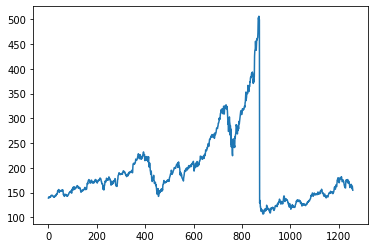

In [488]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [489]:
### LSTM are sensitive to the scale of the data so we apply MinMax scaler

In [490]:
import numpy as np

In [491]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [492]:
print(df1)

[[0.08052599]
 [0.08420789]
 [0.08478397]
 ...
 [0.14053851]
 [0.12944271]
 [0.11994991]]


In [493]:
### splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [494]:
training_size, test_size

(818, 441)

In [495]:
train_data

array([[0.08052599],
       [0.08420789],
       [0.08478397],
       [0.08303068],
       [0.08671259],
       [0.08265498],
       [0.0866124 ],
       [0.08536005],
       [0.08465874],
       [0.08525986],
       [0.09257358],
       [0.09337508],
       [0.09289919],
       [0.09222292],
       [0.09232311],
       [0.09500313],
       [0.09312461],
       [0.09222292],
       [0.09142142],
       [0.09099562],
       [0.08713838],
       [0.08756418],
       [0.08568566],
       [0.08763932],
       [0.08606137],
       [0.08475892],
       [0.08916719],
       [0.08874139],
       [0.09217282],
       [0.094402  ],
       [0.09227301],
       [0.09254853],
       [0.09219787],
       [0.09953663],
       [0.101866  ],
       [0.10073889],
       [0.0994114 ],
       [0.10549781],
       [0.11564183],
       [0.11809643],
       [0.116268  ],
       [0.11799624],
       [0.12338134],
       [0.12237946],
       [0.12180338],
       [0.10872887],
       [0.11446462],
       [0.115

In [496]:
test_data

array([[5.80989355e-01],
       [5.91484033e-01],
       [6.14251722e-01],
       [6.13024421e-01],
       [6.13375078e-01],
       [6.08340639e-01],
       [6.31258610e-01],
       [6.50444584e-01],
       [6.34239198e-01],
       [6.46211647e-01],
       [6.18134001e-01],
       [6.38547276e-01],
       [6.46111459e-01],
       [6.44383219e-01],
       [6.44383219e-01],
       [6.68778961e-01],
       [6.65873513e-01],
       [6.87614277e-01],
       [6.91721979e-01],
       [6.93400125e-01],
       [6.88966813e-01],
       [7.04796493e-01],
       [7.11484033e-01],
       [6.99436443e-01],
       [6.97482780e-01],
       [7.17820914e-01],
       [7.04220413e-01],
       [7.06950532e-01],
       [6.62592361e-01],
       [6.60288040e-01],
       [6.82279274e-01],
       [6.66675016e-01],
       [6.84583594e-01],
       [6.96105197e-01],
       [7.96994364e-01],
       [8.23819662e-01],
       [8.31108328e-01],
       [8.35090795e-01],
       [8.73562930e-01],
       [8.45610520e-01],


In [497]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [498]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [499]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [500]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [501]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [502]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [503]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [504]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_28 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [505]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_28 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [506]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 297ms/step - loss: 0.0228 - val_loss: 0.0020
Epoch 2/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0045 - val_loss: 0.0064
Epoch 3/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0023 - val_loss: 8.4210e-04
Epoch 4/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0012 - val_loss: 2.4401e-04
Epoch 5/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0010 - val_loss: 2.2972e-04
Epoch 6/100
12/12 [==============================] - 2s 182ms/step - loss: 9.3509e-04 - val_loss: 3.4299e-04
Epoch 7/100
12/12 [==============================] - 2s 182ms/step - loss: 9.0755e-04 - val_loss: 2.6883e-04
Epoch 8/100
12/12 [==============================] - 2s 183ms/step - loss: 8.6984e-04 - val_loss: 3.0515e-04
Epoch 9/100
12/12 [==============================] - 2s 182ms/step - loss: 8.7590e-04 - val_loss: 3.0237e-04
Epoch 10/100
12/12 [===========================

In [507]:
import tensorflow as tf

In [508]:
tf.__version__

'2.8.0'

In [509]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [510]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [511]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

210.18545807865854

In [512]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

144.10353149848018

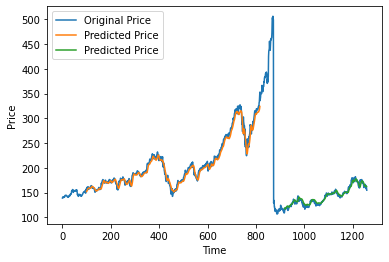

In [513]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label = 'Original Price')
plt.plot(trainPredictPlot, label = 'Predicted Price')
plt.plot(testPredictPlot, label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [514]:
len(test_data)

441

In [515]:
x_input=test_data[len(test_data) - 100:].reshape(1,-1)
x_input.shape


(1, 100)

In [516]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [517]:
temp_input

[0.10499686912961798,
 0.10624921728240444,
 0.10680025046963049,
 0.10482154038822789,
 0.10469630557294918,
 0.10639949906073881,
 0.10522229179711956,
 0.11453976205385091,
 0.10760175328741389,
 0.10549780839073258,
 0.10815278647463994,
 0.11183469004383217,
 0.1105072010018785,
 0.11130870381966185,
 0.10920475892298054,
 0.11013149655604254,
 0.10289292423293667,
 0.10276768941765807,
 0.10807764558547273,
 0.10810269254852845,
 0.11060738885410137,
 0.11684408265497809,
 0.12781465247338758,
 0.13452723857232307,
 0.13570444583594238,
 0.13668127739511576,
 0.13800876643706944,
 0.12515967438948022,
 0.1337507827175955,
 0.14642454602379462,
 0.14509705698184094,
 0.14256731371321218,
 0.1377582968065122,
 0.146474639949906,
 0.1611521603005635,
 0.17092047589229803,
 0.16961803381340007,
 0.18186599874765175,
 0.17257357545397617,
 0.16904195366311836,
 0.1814902943018159,
 0.1638572323105823,
 0.16105197244834057,
 0.1575704445835942,
 0.1656856606136506,
 0.1723231058234188,

In [518]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.13366401]
101
1 day input [0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819
 0.16588604 0.15769568 0.14875391 0.14444584 0.13918597 0.13720726
 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907 0.16974327
 0.17282405 0.16546024 0.16418284 0.16235441 0.1702943  0.17392611
 0.16350657 0.15479023 0.15539136 0.16518472 0.16458359 0.15539136
 0.15143394 0.14396994 0.13332498 0

In [519]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [520]:
import matplotlib.pyplot as plt

In [521]:
len(df1)

1259

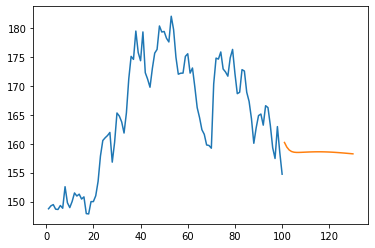

In [522]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1) - 100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

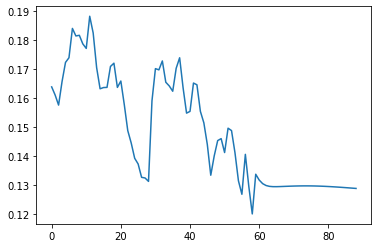

In [523]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [524]:
df3=scaler.inverse_transform(df3).tolist()

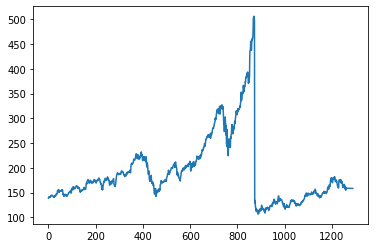

In [525]:
plt.plot(df3)